### Product and Retail Data Analysis
https://www.kaggle.com/carrie1/ecommerce-data/downloads/ecommerce-data.zip/1

https://www.kaggle.com/admond1994/e-commerce-data-eda/notebook

#### About out Data
- Company - UK-based and registered non-store online retail
- Products for selling - Mainly all-occasion gifts
- Customers - Most are wholesalers (local or international)
- Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [1]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [2]:
# Loading our data
# specify encoding to deal with different formats
df = pd.read_csv("/content/ecommerce_data.csv", encoding = 'ISO-8859-1')


In [3]:
df['index_col'] = df.index
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4


In [4]:
df = df.reset_index()
df['index_remain'] = df['index_col'] % 2
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,0
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,1
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3,1
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4,0


In [5]:
df = df[df.index_remain != 1]
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4,0
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,6,0
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,8,0


In [6]:
df.to_csv("retail_sales.csv")

In [7]:
df.head(25)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4,0
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,6,0
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,8,0
10,10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,10,0
12,12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,12/1/2010 8:34,3.75,13047.0,United Kingdom,12,0
14,14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom,14,0
16,16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/1/2010 8:34,9.95,13047.0,United Kingdom,16,0
18,18,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 8:34,5.95,13047.0,United Kingdom,18,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         270955 non-null  int64  
 1   InvoiceNo     270955 non-null  object 
 2   StockCode     270955 non-null  object 
 3   Description   270225 non-null  object 
 4   Quantity      270955 non-null  int64  
 5   InvoiceDate   270955 non-null  object 
 6   UnitPrice     270955 non-null  float64
 7   CustomerID    203452 non-null  float64
 8   Country       270955 non-null  object 
 9   index_col     270955 non-null  int64  
 10  index_remain  270955 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 24.8+ MB


In [9]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID      67503
Description       730
index_remain        0
index_col           0
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
index               0
dtype: int64

In [10]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom,622,0
1444,1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom,1444,0
1446,1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom,1446,0
1448,1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom,1448,0
1450,1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom,1450,0
1452,1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12/1/2010 14:32,2.51,NaN,United Kingdom,1452,0
1454,1454,536544,21811,CHRISTMAS HANGING HEART WITH BELL,1,12/1/2010 14:32,2.51,NaN,United Kingdom,1454,0
1456,1456,536544,21822,GLITTER CHRISTMAS TREE WITH BELLS,1,12/1/2010 14:32,4.21,NaN,United Kingdom,1456,0
1458,1458,536544,21844,RED RETROSPOT MUG,2,12/1/2010 14:32,5.91,NaN,United Kingdom,1458,0
1460,1460,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,12/1/2010 14:32,3.36,NaN,United Kingdom,1460,0


In [11]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270955 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         270955 non-null  int64         
 1   InvoiceNo     270955 non-null  object        
 2   StockCode     270955 non-null  object        
 3   Description   270225 non-null  object        
 4   Quantity      270955 non-null  int64         
 5   InvoiceDate   270955 non-null  datetime64[ns]
 6   UnitPrice     270955 non-null  float64       
 7   CustomerID    203452 non-null  float64       
 8   Country       270955 non-null  object        
 9   index_col     270955 non-null  int64         
 10  index_remain  270955 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 24.8+ MB


In [13]:
# df_new without missing values
df_no_missing = df.dropna()

In [14]:
# check missing values for each column 
df_no_missing.isnull().sum().sort_values(ascending=False)

index_remain    0
index_col       0
Country         0
CustomerID      0
UnitPrice       0
InvoiceDate     0
Quantity        0
Description     0
StockCode       0
InvoiceNo       0
index           0
dtype: int64

In [15]:
# change columns tyoe - String to Int type 
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')

In [16]:
df_no_missing.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,6,0
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,8,0


In [17]:
# Rename the dataframe to make code more readable
df2 = df_no_missing.copy()

In [18]:
df2.describe().round(2)

,index,Quantity,UnitPrice,CustomerID,index_col,index_remain
count,203452.00,203452.00,203452.00,203452.00,203452.00,203452.0
mean,278049.56,11.36,3.36,15286.63,278049.56,0.0
std,152746.95,249.00,31.18,1713.72,152746.95,0.0
min,0.00,-80995.00,0.00,12346.00,0.00,0.0
25%,147737.50,2.00,1.25,13952.00,147737.50,0.0
50%,284437.00,5.00,1.95,15150.00,284437.00,0.0
75%,409536.50,12.00,3.75,16791.00,409536.50,0.0
max,541908.00,12540.00,8142.75,18287.00,541908.00,0.0


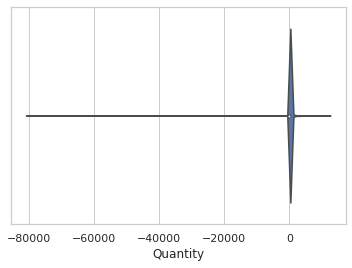

In [19]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

In [20]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,index,Quantity,UnitPrice,CustomerID,index_col,index_remain
count,199005.00,199005.00,199005.00,199005.00,199005.00,199005.0
mean,278507.02,12.67,3.17,15293.33,278507.02,0.0
std,152767.37,51.22,27.17,1713.05,152767.37,0.0
min,0.00,1.00,0.00,12347.00,0.00,0.0
25%,148362.00,2.00,1.25,13969.00,148362.00,0.0
50%,284956.00,6.00,1.95,15157.00,284956.00,0.0
75%,410120.00,12.00,3.75,16794.00,410120.00,0.0
max,541908.00,12540.00,8142.75,18287.00,541908.00,0.0


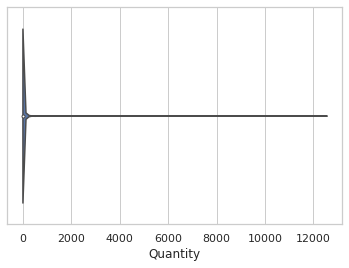

In [21]:
ax = sns.violinplot(x=df2["Quantity"])

In [22]:
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain,AmountSpent
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,0,22.00
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,20.34
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,6,0,25.50
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,8,0,11.10


In [23]:
# Let's add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Month_Year First
df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain,AmountSpent,month_year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30,2010-12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,0,22.00,2010-12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,20.34,2010-12
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,6,0,25.50,2010-12
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,8,0,11.10,2010-12


In [24]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30,2010-12,2010,12,1,2,335,48,4
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,0,22.00,2010-12,2010,12,1,2,335,48,4
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,20.34,2010-12,2010,12,1,2,335,48,4
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,6,0,25.50,2010-12,2010,12,1,2,335,48,4
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,8,0,11.10,2010-12,2010,12,1,2,335,48,4


In [25]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199005 entries, 0 to 541908
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         199005 non-null  int64         
 1   InvoiceNo     199005 non-null  object        
 2   StockCode     199005 non-null  object        
 3   Description   199005 non-null  object        
 4   Quantity      199005 non-null  int64         
 5   InvoiceDate   199005 non-null  datetime64[ns]
 6   UnitPrice     199005 non-null  float64       
 7   CustomerID    199005 non-null  int64         
 8   Country       199005 non-null  object        
 9   index_col     199005 non-null  int64         
 10  index_remain  199005 non-null  int64         
 11  AmountSpent   199005 non-null  float64       
 12  month_year    199005 non-null  period[M]     
 13  year          199005 non-null  int64         
 14  month         199005 non-null  int64         
 15  day           199

In [27]:
# +1 to make Monday=1.....until Sunday=7
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30,2010-12,2010,12,1,3,335,48,4
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,0,22.00,2010-12,2010,12,1,3,335,48,4
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,20.34,2010-12,2010,12,1,3,335,48,4
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,6,0,25.50,2010-12,2010,12,1,3,335,48,4
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,8,0,11.10,2010-12,2010,12,1,3,335,48,4


## Exploring and Analysing the Data

In [28]:
# Consolidating the number of Sales Made per customer for each country
# We use InvoiceNo as the count for sales
sales_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberOfSales
3998,17841,United Kingdom,3917
1878,14911,EIRE,2843
1290,14096,United Kingdom,2557
333,12748,United Kingdom,2306
1661,14606,United Kingdom,1348
2174,15311,United Kingdom,1201
1689,14646,Netherlands,1038
568,13089,United Kingdom,908
695,13263,United Kingdom,840
1435,14298,United Kingdom,814


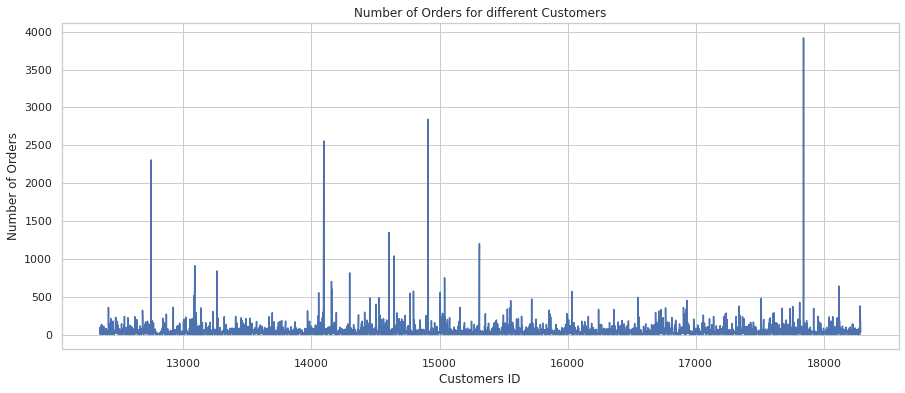

In [29]:
# Visualizing No. of Sales for all Customers

orders = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

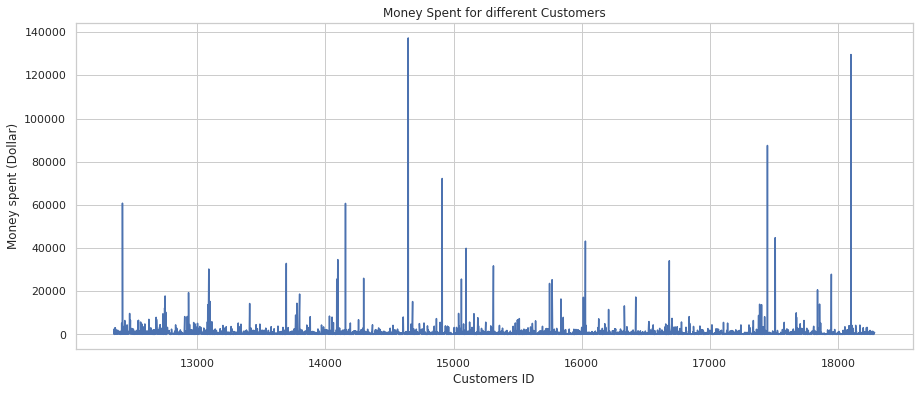

In [30]:
# Visualizing Money Spent for all Customer
money_spent = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [31]:
# Consolidating the number of Sales Made per customer (Revenue)
# we use use index=False, to indicate to the groupby that we don't want to set the column ID as index
spent_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1689,14646,Netherlands,137356.42
4185,18102,United Kingdom,129676.37
3717,17450,United Kingdom,87556.19
1878,14911,EIRE,72258.43
56,12415,Australia,60819.74
1334,14156,EIRE,60722.43
3760,17511,United Kingdom,44852.65
2698,16029,United Kingdom,43238.17
2010,15098,United Kingdom,39916.50
1290,14096,United Kingdom,34688.84


# Purchasing Patterns
https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

In [32]:
# Check our data
df2.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30,2010-12,2010,12,1,3,335,48,4
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,0,22.00,2010-12,2010,12,1,3,335,48,4
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,20.34,2010-12,2010,12,1,3,335,48,4
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,6,0,25.50,2010-12,2010,12,1,3,335,48,4
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,8,0,11.10,2010-12,2010,12,1,3,335,48,4


In [33]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [34]:
# Check to see if our year_month and hour columns were made
df2.head()

,index,InvoiceNo,year_month,StockCode,Description,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,0,536365,201012,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30,2010-12,2010,12,1,3,335,48,4
2,2,536365,201012,84406B,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,0,22.00,2010-12,2010,12,1,3,335,48,4
4,4,536365,201012,84029E,RED WOOLLY HOTTIE WHITE HEART.,8,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,20.34,2010-12,2010,12,1,3,335,48,4
6,6,536365,201012,21730,GLASS STAR FROSTED T-LIGHT HOLDER,8,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,6,0,25.50,2010-12,2010,12,1,3,335,48,4
8,8,536366,201012,22632,HAND WARMER RED POLKA DOT,8,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,8,0,11.10,2010-12,2010,12,1,3,335,48,4


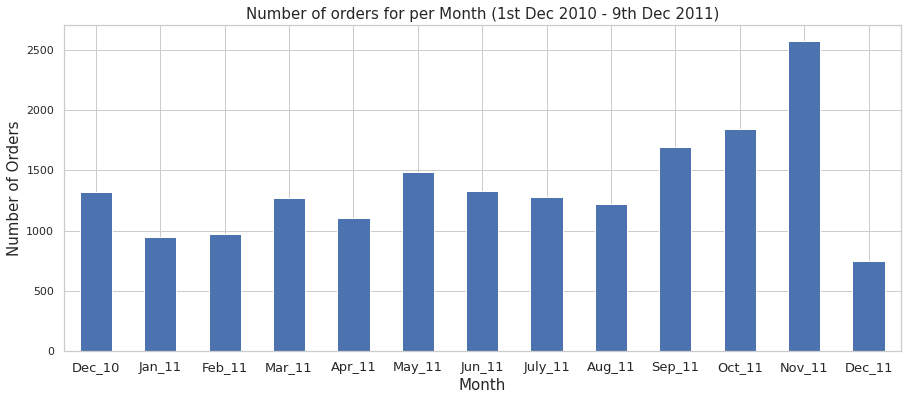

In [35]:
# Create a plot that shows the number of orders per month 
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

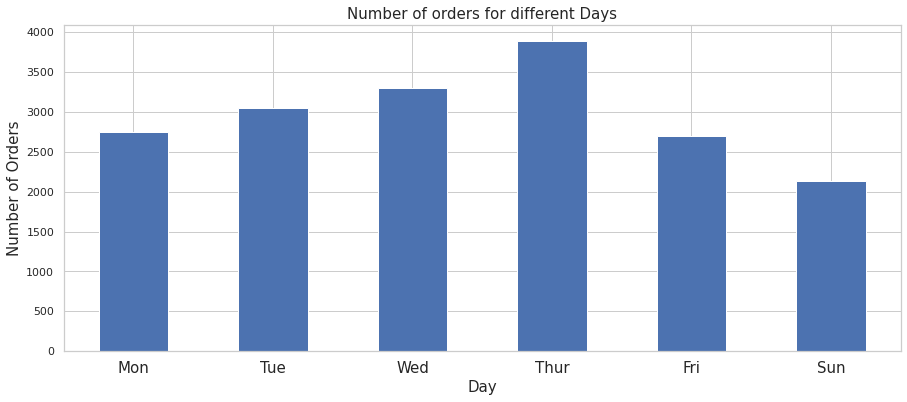

In [36]:
# Create a plot for the number of orders per day of the weekve
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [37]:
df2.columns

Index(['index', 'InvoiceNo', 'year_month', 'StockCode', 'Description', 'hour',
       'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'index_col', 'index_remain', 'AmountSpent', 'month_year', 'year',
       'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter'],
      dtype='object')

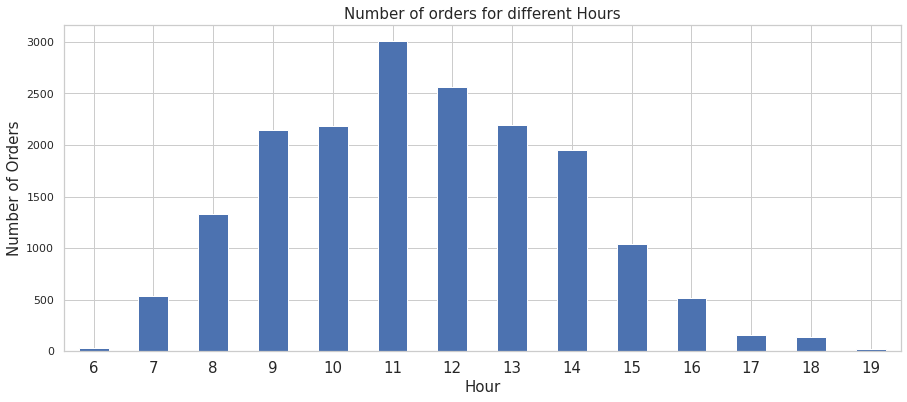

In [38]:
# Let's Plot the  number of orders per hour
ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

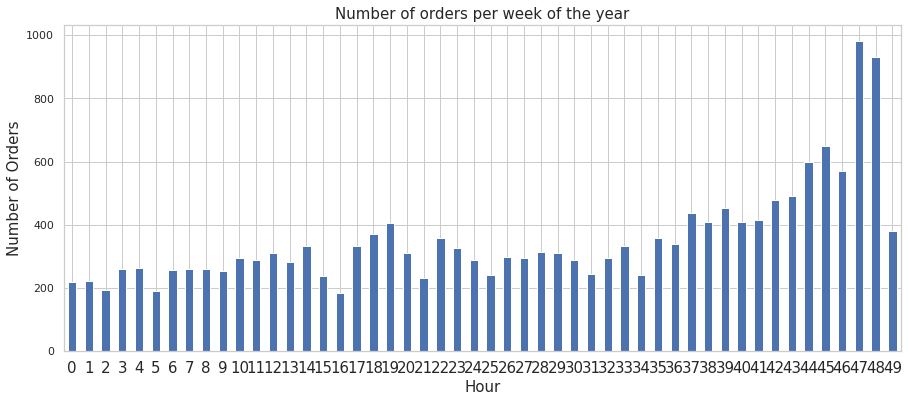

In [39]:
# Number of sales per week of the year
ax = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)
plt.show()

### Analyze Unit Prices of our items

In [40]:
df2.UnitPrice.describe()

count    199005.000000
mean          3.166517
std          27.169379
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

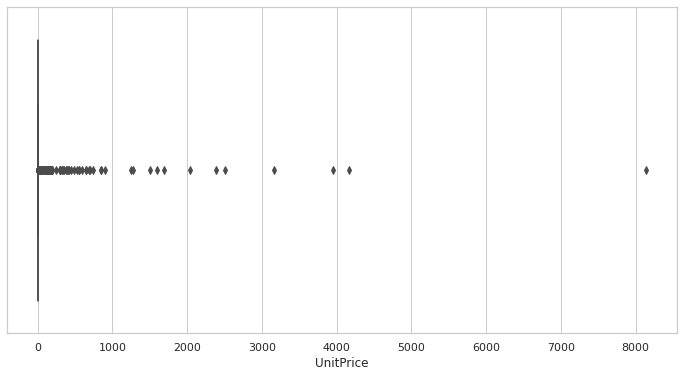

In [41]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [42]:
# What are the free items
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

19


,index,InvoiceNo,year_month,StockCode,Description,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,index_col,index_remain,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,9302,537197,201012,22841,ROUND CAKE TIN VINTAGE GREEN,14,1,2010-12-05 14:02:00,0.0,12647,Germany,9302,0,0.0,2010-12,2010,12,5,7,339,48,4
33576,33576,539263,201012,22580,ADVENT CALENDAR GINGHAM SACK,14,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,33576,0,0.0,2010-12,2010,12,16,4,350,50,4
47068,47068,540372,201101,22090,PAPER BUNTING RETROSPOT,16,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,47068,0,0.0,2011-01,2011,1,6,4,6,1,1
47070,47070,540372,201101,22553,PLASTERS IN TIN SKULLS,16,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,47070,0,0.0,2011-01,2011,1,6,4,6,1,1
56674,56674,541109,201101,22168,ORGANISER WOOD ANTIQUE WHITE,15,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,56674,0,0.0,2011-01,2011,1,13,4,13,2,1


In [43]:
# See when these free items were given out
df_free.year_month.value_counts().sort_index()

201012    2
201101    3
201103    1
201104    2
201107    2
201108    3
201110    1
201111    5
Name: year_month, dtype: int64

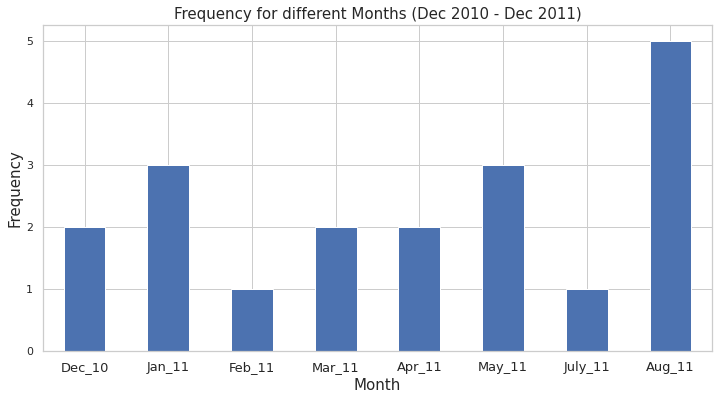

In [44]:
# Ploting the above data
ax = df_free.year_month.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)

### Analysis per Country

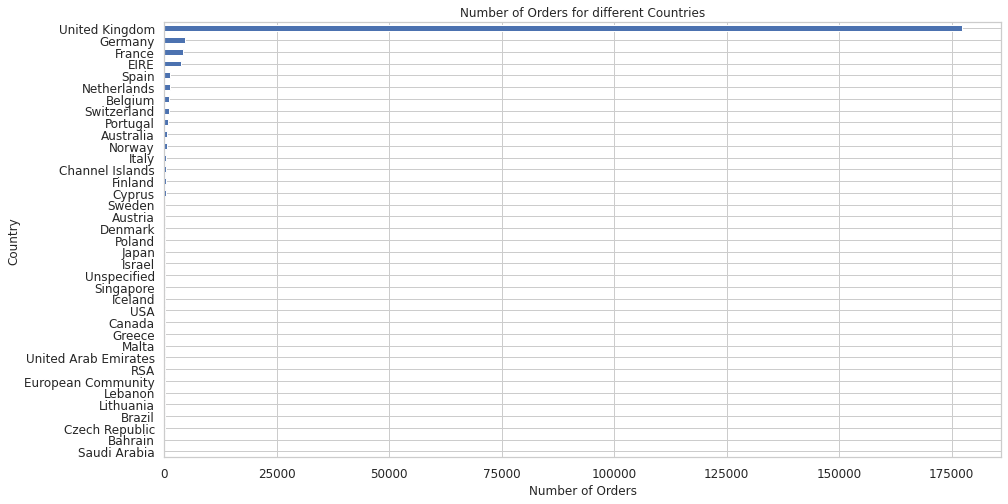

In [45]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

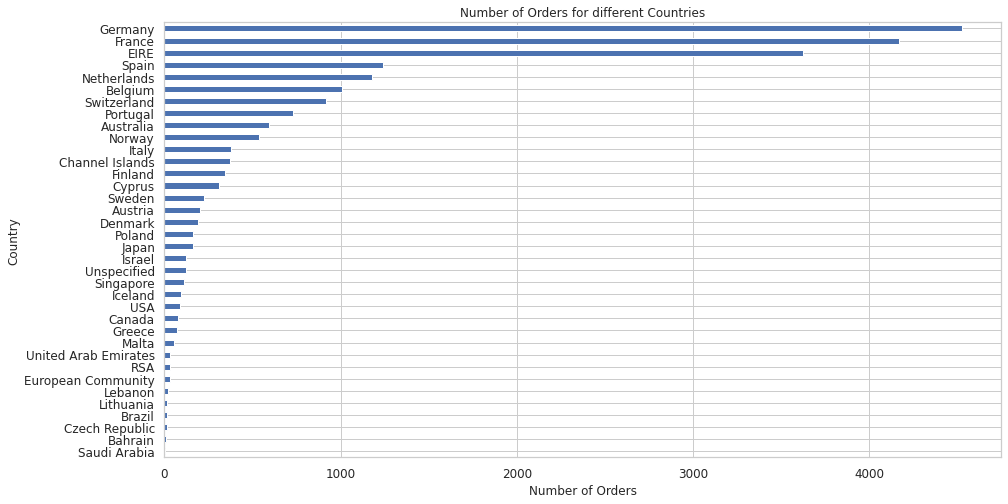

In [46]:
# Excluding UK now

group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind ='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

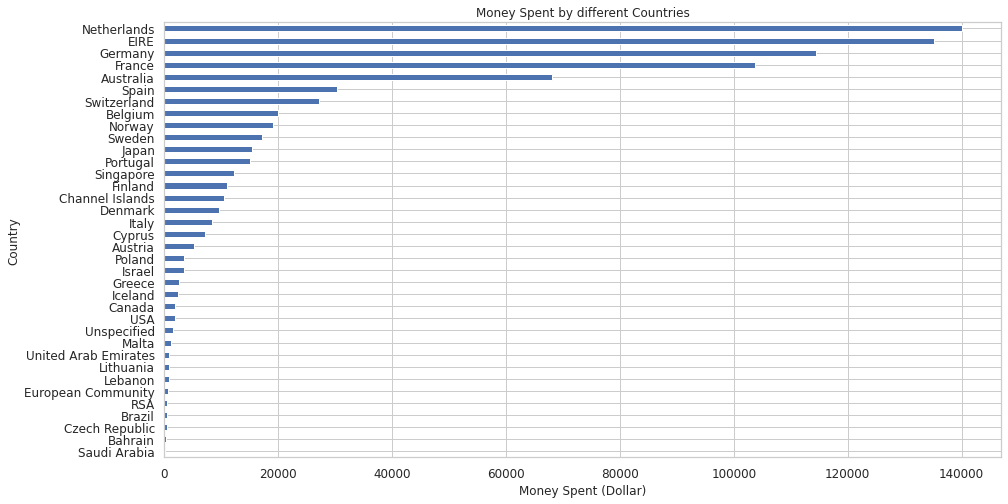

In [47]:
# Amount spent by each country (without UK)
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## Repeat Customers

In [48]:
# Get our date range for our data
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [49]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,83.14,17850,United Kingdom
1,536366,2010-12-01 08:28:00,11.10,17850,United Kingdom
2,536367,2010-12-01 08:34:00,137.65,13047,United Kingdom
3,536368,2010-12-01 08:34:00,29.70,13047,United Kingdom
4,536370,2010-12-01 08:45:00,419.48,12583,France


In [50]:
# Sort on Amount spent, this gives us the largest invoices
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
7625,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
5258,550461,2011-04-18 13:20:00,15425.90,15749,United Kingdom
7804,556917,2011-06-15 13:37:00,11839.95,12415,Australia
11936,567423,2011-09-20 11:05:00,11254.52,17450,United Kingdom
11928,567381,2011-09-20 10:12:00,10195.36,17450,United Kingdom
13899,572209,2011-10-21 12:08:00,9855.00,18102,United Kingdom
531,537659,2010-12-07 16:43:00,9827.36,18102,United Kingdom
13814,572035,2011-10-20 12:03:00,9800.24,14646,Netherlands
10424,563614,2011-08-18 08:51:00,9787.60,12415,Australia
3356,545475,2011-03-03 10:59:00,9133.40,12415,Australia


In [51]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    238
2011-01-31    140
2011-02-28    143
2011-03-31    188
2011-04-30    153
2011-05-31    258
2011-06-30    207
2011-07-31    210
2011-08-31    177
2011-09-30    250
2011-10-31    293
2011-11-30    517
Freq: M, Name: CustomerID, dtype: int64

In [52]:
# Number of Unique customers per month
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     868
2011-01-31     727
2011-02-28     743
2011-03-31     959
2011-04-30     844
2011-05-31    1041
2011-06-30     972
2011-07-31     937
2011-08-31     916
2011-09-30    1247
2011-10-31    1350
2011-11-30    1646
Freq: M, Name: CustomerID, dtype: int64

In [53]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    27.419355
2011-01-31    19.257221
2011-02-28    19.246299
2011-03-31    19.603754
2011-04-30    18.127962
2011-05-31    24.783862
2011-06-30    21.296296
2011-07-31    22.411953
2011-08-31    19.323144
2011-09-30    20.048115
2011-10-31    21.703704
2011-11-30    31.409478
Freq: M, Name: CustomerID, dtype: float64

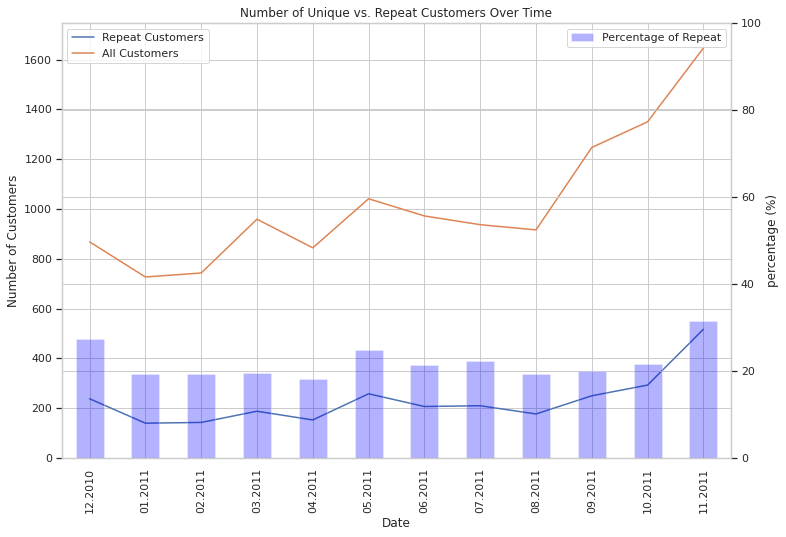

In [54]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [55]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue_df = df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    60.526544
2011-01-31    42.882454
2011-02-28    38.490585
2011-03-31    42.465432
2011-04-30    39.224926
2011-05-31    54.786305
2011-06-30    58.956696
2011-07-31    51.645633
2011-08-31    46.398193
2011-09-30    50.596348
2011-10-31    51.218138
2011-11-30    60.855442
Freq: M, Name: AmountSpent, dtype: float64

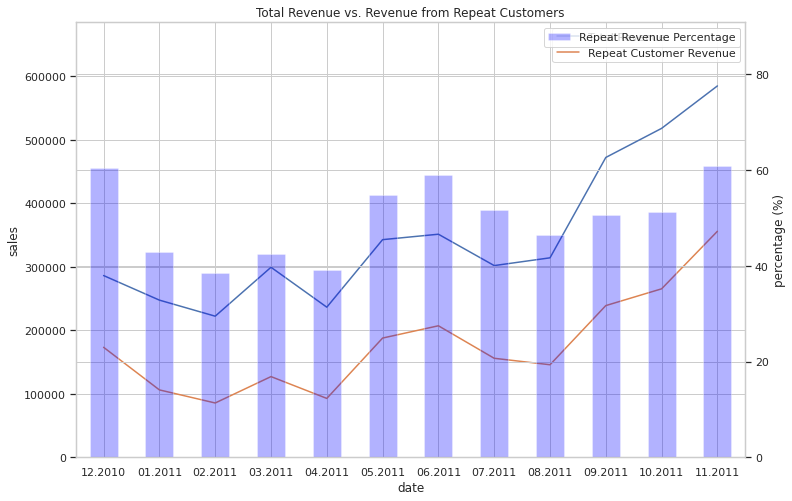

In [56]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

# Item Trends

Let's count the number of items sold for each product for each period.

In [57]:
# Now let's get quantity of each item sold per month
date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        106
             10120         15
             10124A         4
             10125        101
             10133         93
             10135        232
             11001         48
             15034          1
             15036         84
             15039         15
             15044A         6
             15044C         1
             15056BL       45
             15056N        66
             15056P        16
Name: Quantity, dtype: int64

In [58]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2228,2011-11-30,84826,12541
1470,2011-11-30,23084,4927
764,2011-11-30,22197,3567
2334,2011-11-30,85099B,3517
681,2011-11-30,22086,3367
18,2011-11-30,16014,3003
2476,2011-11-30,M,2870
1057,2011-11-30,22577,2650
1058,2011-11-30,22578,2476
588,2011-11-30,21915,2413


In [59]:
# Let's look at the top 5 items sale per month 

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         1482
             22197         1327
             84826           62
             85099B         727
2011-01-31   22086           18
             22197         1145
             84826          300
             85099B        1965
2011-02-28   22086            5
             22197          947
             84826           66
             85099B        1277
2011-03-31   22086           47
             22197         1658
             85099B        2150
2011-04-30   22086          -28
             22197         1204
             84826            1
             85099B        1515
2011-05-31   22086           17
             22197         1628
             23084          432
             85099B        1977
2011-06-30   22086          325
             22197         1359
             23084          880
             85099B        1653
2011-07-31   22086          221
             22197          802
             23084           61
             8482

In [60]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,1482.0,1327.0,0.0,62.0,727.0
2011-01-31,18.0,1145.0,0.0,300.0,1965.0
2011-02-28,5.0,947.0,0.0,66.0,1277.0
2011-03-31,47.0,1658.0,0.0,0.0,2150.0
2011-04-30,-28.0,1204.0,0.0,1.0,1515.0
2011-05-31,17.0,1628.0,432.0,0.0,1977.0
2011-06-30,325.0,1359.0,880.0,0.0,1653.0
2011-07-31,221.0,802.0,61.0,2.0,1446.0
2011-08-31,243.0,1277.0,607.0,60.0,3150.0


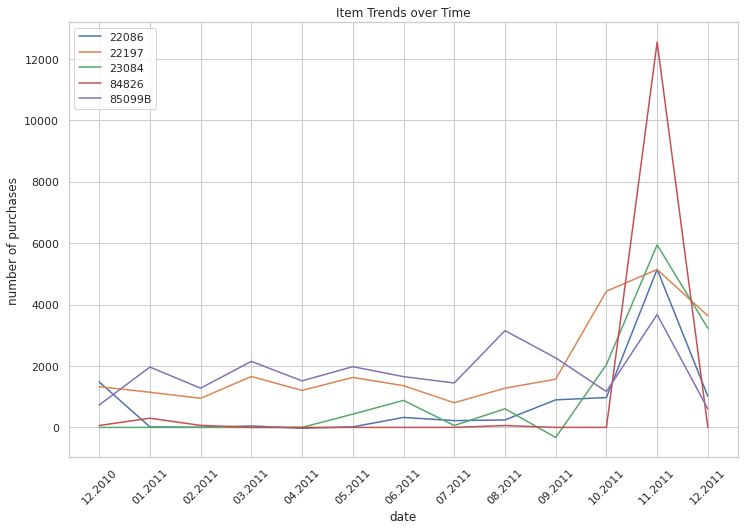

In [61]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

plt.show()